# Part-I: WeatherPy
## Three observable trends based on the data:
### 1. The higher the latitude is, the lower the temperature gets exponentially, and vice versa
### 2. The higher the latitude is, the lower the humidity gets exponentially, and vice versa
### 3. The percentage of cloudiness is scattered almost evenly with both, higher and lower latitude

In [1]:
# Dependencies and Setup
from numpy.random import uniform
import requests
import json
import csv
from citipy import citipy
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from IPython.display import display
from config import api_key
import matplotlib.pyplot as plt
from datetime import datetime
%matplotlib inline

lats = list(uniform(-90, 90, 2000))
lons = list(uniform(-180, 180, 2000))

cities_list = []
a = 0
pro_dir = ''

## Generate Cities List

In [2]:
print('Starting...')

with open(pro_dir + '../selected_cities/selected_cities.csv', mode = 'w', newline = '') as city_file:
    city_writer = csv.writer(city_file, delimiter = ',', quotechar = '"', quoting = csv.QUOTE_MINIMAL)
    city_writer.writerow(['City Name',
                          'Latitude',
                          'Longitude',
                          'Temperature (F)',
                          'Max. Temp (F)',
                          'Min. Temp (F)',
                          'Humidity (%)',
                          'Cloudiness (%)',
                          'Wind Speed (mph)',
                          'Country Code', 'Date & Time']
                        )
    for j in range(2000):
        lat = lats[j]
        lon = lons[j]
        
        city = citipy.nearest_city(lat, lon)
        city_name = city.city_name
        print('Fetching and processing record for: ', city_name)

        url = "https://api.openweathermap.org/data/2.5/weather?q=%s&appid=%s&units=imperial" % (city_name, api_key)
        
        if not city_name in cities_list:
            response = requests.get(url)
            data = json.loads(response.text)
            try:
                to_save = [city_name,
                           data['coord']['lat'],
                           data['coord']['lon'],
                           data['main']['temp'],
                           data['main']['temp_max'],
                           data['main']['temp_min'],
                           data['main']['humidity'],
                           data['clouds']['all'],
                           data['wind']['speed'],
                           data['sys']['country'],
                           datetime.fromtimestamp(data['dt']).strftime("%d-%m-%Y %H:%M:%S")
                          ]
                city_writer.writerow(to_save)
                cities_list.append(city_name)
                a+=1
            except:
                print(data['message'] + '!')

        if a == 500:
            break

print('Total Cites: ', len(cities_list))

Starting...
Fetching and processing record for:  port blair
Fetching and processing record for:  hermanus
Fetching and processing record for:  yellowknife
Fetching and processing record for:  ancud
Fetching and processing record for:  nabire
Fetching and processing record for:  hobart
Fetching and processing record for:  ushuaia
Fetching and processing record for:  karratha
Fetching and processing record for:  vaini
Fetching and processing record for:  airai
Fetching and processing record for:  atambua
Fetching and processing record for:  vanimo
Fetching and processing record for:  pacific grove
Fetching and processing record for:  dikson
Fetching and processing record for:  skelleftea
Fetching and processing record for:  dikson
Fetching and processing record for:  bluff
Fetching and processing record for:  waipawa
Fetching and processing record for:  kruisfontein
Fetching and processing record for:  pevek
Fetching and processing record for:  rikitea
Fetching and processing record for:

Fetching and processing record for:  chuy
Fetching and processing record for:  avarua
Fetching and processing record for:  alofi
Fetching and processing record for:  mataura
Fetching and processing record for:  kapaa
Fetching and processing record for:  hasaki
Fetching and processing record for:  torbay
Fetching and processing record for:  kavieng
Fetching and processing record for:  saskylakh
Fetching and processing record for:  mandiana
Fetching and processing record for:  tumannyy
city not found!
Fetching and processing record for:  do rud
city not found!
Fetching and processing record for:  longyearbyen
Fetching and processing record for:  mar del plata
Fetching and processing record for:  jamestown
Fetching and processing record for:  noyabrsk
Fetching and processing record for:  tuktoyaktuk
Fetching and processing record for:  marzuq
Fetching and processing record for:  mataura
Fetching and processing record for:  ouallam
Fetching and processing record for:  saint-philippe
Fetchi

Fetching and processing record for:  vanimo
Fetching and processing record for:  dikson
Fetching and processing record for:  mataura
Fetching and processing record for:  natal
Fetching and processing record for:  rikitea
Fetching and processing record for:  mataura
Fetching and processing record for:  zhanatas
city not found!
Fetching and processing record for:  tabukiniberu
city not found!
Fetching and processing record for:  hermanus
Fetching and processing record for:  avarua
Fetching and processing record for:  attawapiskat
city not found!
Fetching and processing record for:  punta arenas
Fetching and processing record for:  saldanha
Fetching and processing record for:  vaini
Fetching and processing record for:  chuy
Fetching and processing record for:  provideniya
Fetching and processing record for:  poya
Fetching and processing record for:  aksha
Fetching and processing record for:  bonthe
Fetching and processing record for:  mataura
Fetching and processing record for:  ipameri
F

Fetching and processing record for:  hermanus
Fetching and processing record for:  yellowknife
Fetching and processing record for:  karamea
city not found!
Fetching and processing record for:  hualmay
Fetching and processing record for:  agboville
Fetching and processing record for:  necochea
Fetching and processing record for:  atuona
Fetching and processing record for:  vardo
Fetching and processing record for:  jamestown
Fetching and processing record for:  margate
Fetching and processing record for:  mwinilunga
Fetching and processing record for:  albany
Fetching and processing record for:  egvekinot
Fetching and processing record for:  porbandar
Fetching and processing record for:  atuona
Fetching and processing record for:  inhambane
Fetching and processing record for:  atuona
Fetching and processing record for:  butaritari
Fetching and processing record for:  taolanaro
city not found!
Fetching and processing record for:  avarua
Fetching and processing record for:  port alfred
Fe

Fetching and processing record for:  severo-kurilsk
Fetching and processing record for:  rikitea
Fetching and processing record for:  chhukha
city not found!
Fetching and processing record for:  ryde
Fetching and processing record for:  butaritari
Fetching and processing record for:  sorland
Fetching and processing record for:  bluff
Fetching and processing record for:  meulaboh
Fetching and processing record for:  mys shmidta
city not found!
Fetching and processing record for:  umzimvubu
city not found!
Fetching and processing record for:  hermanus
Fetching and processing record for:  barra do garcas
Fetching and processing record for:  yellowknife
Fetching and processing record for:  saint-philippe
Fetching and processing record for:  hobart
Fetching and processing record for:  port alfred
Fetching and processing record for:  vaini
Fetching and processing record for:  ushuaia
Fetching and processing record for:  punta arenas
Fetching and processing record for:  tuatapere
Fetching and

Fetching and processing record for:  rikitea
Fetching and processing record for:  eydhafushi
Fetching and processing record for:  puerto ayora
Fetching and processing record for:  ponta do sol
Fetching and processing record for:  sioux lookout
Fetching and processing record for:  ilulissat
Fetching and processing record for:  karaul
city not found!
Fetching and processing record for:  port alfred
Fetching and processing record for:  ribeira grande
Fetching and processing record for:  atuona
Fetching and processing record for:  punta arenas
Fetching and processing record for:  saleaula
city not found!
Fetching and processing record for:  hambantota
Fetching and processing record for:  hasaki
Fetching and processing record for:  nikolskoye
Fetching and processing record for:  raudeberg
Fetching and processing record for:  hermanus
Fetching and processing record for:  mar del plata
Fetching and processing record for:  carnarvon
Fetching and processing record for:  coahuayana
Fetching and 

Fetching and processing record for:  guerande
Fetching and processing record for:  castro
Fetching and processing record for:  cap malheureux
Fetching and processing record for:  yellowknife
Fetching and processing record for:  bredasdorp
Fetching and processing record for:  albany
Fetching and processing record for:  thompson
Fetching and processing record for:  kaitangata
Fetching and processing record for:  constitucion
Fetching and processing record for:  punta arenas
Fetching and processing record for:  busselton
Fetching and processing record for:  sentyabrskiy
city not found!
Fetching and processing record for:  ritchie
Fetching and processing record for:  saint-pierre
Fetching and processing record for:  atuona
Fetching and processing record for:  atuona
Fetching and processing record for:  hithadhoo
Fetching and processing record for:  mar del plata
Fetching and processing record for:  kaitangata
Fetching and processing record for:  gerash
Fetching and processing record for:  

Fetching and processing record for:  kruisfontein
Fetching and processing record for:  ushuaia
Fetching and processing record for:  tuktoyaktuk
Fetching and processing record for:  albany
Fetching and processing record for:  port elizabeth
Fetching and processing record for:  vaini
Fetching and processing record for:  jamestown
Fetching and processing record for:  bethel
Fetching and processing record for:  bredasdorp
Fetching and processing record for:  athabasca
Fetching and processing record for:  inhambane
Fetching and processing record for:  busselton
Fetching and processing record for:  dikson
Fetching and processing record for:  nouakchott
Fetching and processing record for:  parabel
Fetching and processing record for:  pevek
Fetching and processing record for:  namibe
Fetching and processing record for:  ketchikan
Fetching and processing record for:  airai
Fetching and processing record for:  hithadhoo
Fetching and processing record for:  muros
Fetching and processing record fo

## Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it's being processed (with the city number and city name).

## Convert Raw Data to DataFrame
* Export the city data into a CSV file
* Display the DataFrame

In [3]:
cities_path = "../selected_cities/selected_cities.csv"

# Read the 'Cities' data that we just stored in a CSV file.
cities_data = pd.read_csv(pro_dir + cities_path)
display(cities_data)

,City Name,Latitude,Longitude,Temperature (F),Max. Temp (F),Min. Temp (F),Humidity (%),Cloudiness (%),Wind Speed (mph),Country Code,Date & Time
0,port blair,11.6667,92.7500,81.72,81.72,81.72,62,31,11.74,IN,14-01-2021 17:36:31
1,hermanus,-34.4187,19.2345,72.00,72.00,72.00,84,83,5.01,ZA,14-01-2021 17:29:46
2,yellowknife,62.4560,-114.3525,6.62,7.00,6.01,85,40,8.05,CA,14-01-2021 17:31:09
3,ancud,-41.8697,-73.8203,44.78,46.99,42.80,93,0,2.59,CL,14-01-2021 17:36:34
4,nabire,-3.3667,135.4833,86.20,86.20,86.20,66,82,3.00,ID,14-01-2021 17:36:35
...,...,...,...,...,...,...,...,...,...,...,...
495,tonstad,58.6626,6.7169,21.31,27.00,19.00,77,0,4.25,NO,14-01-2021 17:47:41
496,gat,31.6100,34.7642,58.17,60.01,55.99,100,3,3.00,IL,14-01-2021 17:47:42
497,kuala terengganu,5.3302,103.1408,80.31,80.60,80.01,74,40,4.61,MY,14-01-2021 17:47:44
498,murindo,6.9848,-76.7544,73.18,73.18,73.18,95,100,1.45,CO,14-01-2021 17:47:45


In [4]:
described_data = cities_data.describe()
display(described_data)

,Latitude,Longitude,Temperature (F),Max. Temp (F),Min. Temp (F),Humidity (%),Cloudiness (%),Wind Speed (mph)
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.00000
mean,20.037943,20.680888,48.666140,49.268620,48.018400,73.920000,54.416000,7.71482
std,34.182196,89.324438,33.510356,33.541594,33.593096,20.607546,41.209701,5.57444
min,-54.800000,-179.166700,-46.910000,-46.910000,-46.910000,12.000000,0.000000,0.45000
25%,-8.898350,-56.103300,28.395000,30.150000,27.000000,67.000000,2.000000,3.44000
50%,22.912100,22.467000,59.730000,60.100000,59.080000,79.000000,72.000000,6.21000
75%,50.125100,100.409000,75.475000,75.735000,75.200000,88.000000,98.000000,10.80750
max,78.218600,178.416700,107.100000,107.100000,107.100000,100.000000,100.000000,40.26000


## Inspect the data and remove the cities where the humidity > 100%
Skip this step if there are no cities that have humidity > 100%. 

In [5]:
# There is no city with humidity greated than 100% but still for understanding, 
# following is the method to take only ones that are greater or equal to 100% humidity.

cities_data_removed_g100_humidity = cities_data[cities_data['Humidity (%)'] <= 100]
print(cities_data_removed_g100_humidity.shape)
display(cities_data_removed_g100_humidity)

(500, 11)


,City Name,Latitude,Longitude,Temperature (F),Max. Temp (F),Min. Temp (F),Humidity (%),Cloudiness (%),Wind Speed (mph),Country Code,Date & Time
0,port blair,11.6667,92.7500,81.72,81.72,81.72,62,31,11.74,IN,14-01-2021 17:36:31
1,hermanus,-34.4187,19.2345,72.00,72.00,72.00,84,83,5.01,ZA,14-01-2021 17:29:46
2,yellowknife,62.4560,-114.3525,6.62,7.00,6.01,85,40,8.05,CA,14-01-2021 17:31:09
3,ancud,-41.8697,-73.8203,44.78,46.99,42.80,93,0,2.59,CL,14-01-2021 17:36:34
4,nabire,-3.3667,135.4833,86.20,86.20,86.20,66,82,3.00,ID,14-01-2021 17:36:35
...,...,...,...,...,...,...,...,...,...,...,...
495,tonstad,58.6626,6.7169,21.31,27.00,19.00,77,0,4.25,NO,14-01-2021 17:47:41
496,gat,31.6100,34.7642,58.17,60.01,55.99,100,3,3.00,IL,14-01-2021 17:47:42
497,kuala terengganu,5.3302,103.1408,80.31,80.60,80.01,74,40,4.61,MY,14-01-2021 17:47:44
498,murindo,6.9848,-76.7544,73.18,73.18,73.18,95,100,1.45,CO,14-01-2021 17:47:45


In [6]:
# Get the indices of cities that have humidity over 100%.
# There is no such value in our data but the method is as follow:

indexs_hum_g100 = cities_data[cities_data['Humidity (%)'] > 100].index
print(indexs_hum_g100)

Int64Index([], dtype='int64')


In [7]:
# Making a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace = False" will make a copy of the 'city_data' DataFrame, which we call "clean_city_data".

q1 = cities_data['Humidity (%)'].quantile(0.25)
q3 = cities_data['Humidity (%)'].quantile(0.75)
iqr = q3-q1

# For our understanding, let's find out the outlier data as well.
cities_with_humid_outliers_1 = cities_data[cities_data['Humidity (%)'] < (q1 - 1.5 * iqr)]
cities_with_humid_outliers_2 =cities_data[cities_data['Humidity (%)'] > (q3 + 1.5 * iqr)]
cities_with_humid_outliers = pd.concat([cities_with_humid_outliers_1, cities_with_humid_outliers_2])

# Take the data with no outliers in humidity - 'clean_cities_data'
cities_without_humid_outliers_1 = cities_data[cities_data['Humidity (%)'] > (q1 - 1.5 * iqr)]
clean_cities_data = cities_without_humid_outliers_1[cities_without_humid_outliers_1['Humidity (%)']  < (q3 + 1.5 * iqr)]

print('Outliers Shape:', cities_with_humid_outliers.shape, '\nClean City Data Shape:', clean_cities_data.shape)
display(clean_cities_data)
display(cities_with_humid_outliers)

Outliers Shape: (44, 11) 
Clean City Data Shape: (456, 11)


,City Name,Latitude,Longitude,Temperature (F),Max. Temp (F),Min. Temp (F),Humidity (%),Cloudiness (%),Wind Speed (mph),Country Code,Date & Time
0,port blair,11.6667,92.7500,81.72,81.72,81.72,62,31,11.74,IN,14-01-2021 17:36:31
1,hermanus,-34.4187,19.2345,72.00,72.00,72.00,84,83,5.01,ZA,14-01-2021 17:29:46
2,yellowknife,62.4560,-114.3525,6.62,7.00,6.01,85,40,8.05,CA,14-01-2021 17:31:09
3,ancud,-41.8697,-73.8203,44.78,46.99,42.80,93,0,2.59,CL,14-01-2021 17:36:34
4,nabire,-3.3667,135.4833,86.20,86.20,86.20,66,82,3.00,ID,14-01-2021 17:36:35
...,...,...,...,...,...,...,...,...,...,...,...
495,tonstad,58.6626,6.7169,21.31,27.00,19.00,77,0,4.25,NO,14-01-2021 17:47:41
496,gat,31.6100,34.7642,58.17,60.01,55.99,100,3,3.00,IL,14-01-2021 17:47:42
497,kuala terengganu,5.3302,103.1408,80.31,80.60,80.01,74,40,4.61,MY,14-01-2021 17:47:44
498,murindo,6.9848,-76.7544,73.18,73.18,73.18,95,100,1.45,CO,14-01-2021 17:47:45


,City Name,Latitude,Longitude,Temperature (F),Max. Temp (F),Min. Temp (F),Humidity (%),Cloudiness (%),Wind Speed (mph),Country Code,Date & Time
7,karratha,-20.7377,116.8463,107.10,107.10,107.10,18,0,13.24,AU,14-01-2021 17:36:38
30,busselton,-33.6500,115.3333,81.64,82.00,81.00,35,49,1.01,AU,14-01-2021 17:30:50
70,saint george,37.1041,-113.5841,37.40,37.40,37.40,28,1,3.44,US,14-01-2021 17:29:36
100,riyadh,24.6877,46.7219,58.33,59.00,57.20,25,0,8.08,SA,14-01-2021 17:37:59
109,mandiana,10.6333,-8.6833,64.11,64.11,64.11,25,53,5.19,GN,14-01-2021 17:38:51
111,marzuq,14.4000,46.4667,66.09,66.09,66.09,27,0,3.94,YE,14-01-2021 17:38:56
112,ouallam,14.3188,2.0866,66.67,66.67,66.67,23,0,10.00,NE,14-01-2021 17:38:57
139,mount isa,-20.7333,139.5000,100.40,100.40,100.40,20,2,12.66,AU,14-01-2021 17:39:28
165,kagoro,9.6000,8.3833,68.54,68.54,68.54,23,21,4.56,NG,14-01-2021 17:40:00
170,veraval,20.9000,70.3667,80.58,80.58,80.58,28,2,3.87,IN,14-01-2021 17:40:07


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Temperature (F) vs. Latitude Scatter Plot

Date & Time: 14-01-2021 17:38:25


<Figure size 432x288 with 0 Axes>

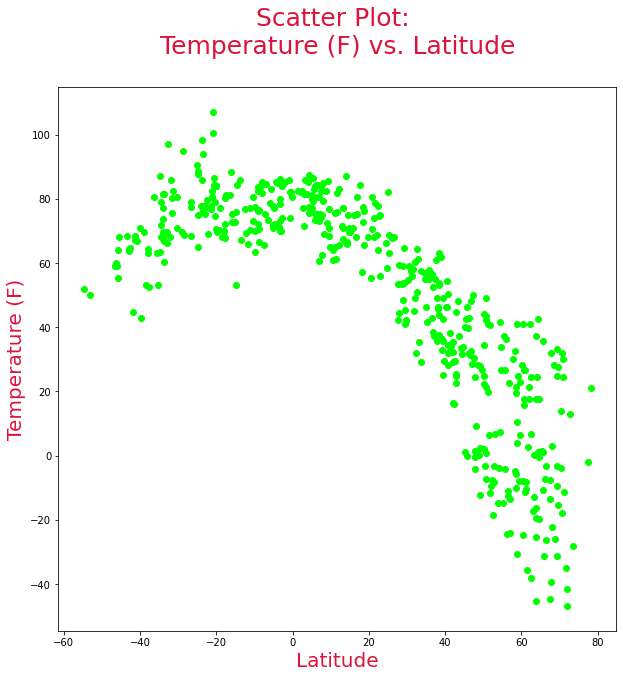

Note: This scatter plot is analyzing the relation between temperature (F) and latitude.


In [8]:
plt.figure()
plt.figure(figsize = (10, 10))
plt.scatter(cities_data['Latitude'], cities_data['Temperature (F)'], c = 'lime')
plt.xlabel('Latitude', fontsize = 20, c = 'crimson')
plt.ylabel('Temperature (F)', fontsize = 20, c = 'crimson')
plt.title('Scatter Plot: \n Temperature (F) vs. Latitude \n', fontsize = 25, c = 'crimson')
plt.savefig(pro_dir + 'output_images/01_scatter_plot_temp_vs_lat.png')
print(f'Date & Time: ' + (datetime.fromtimestamp(data['dt']).strftime("%d-%m-%Y %H:%M:%S")))
plt.show()
print('Note: This scatter plot is analyzing the relation between temperature (F) and latitude.')

## Humidity (%) vs. Latitude Scatter Plot

Date & Time: 14-01-2021 17:38:25


<Figure size 432x288 with 0 Axes>

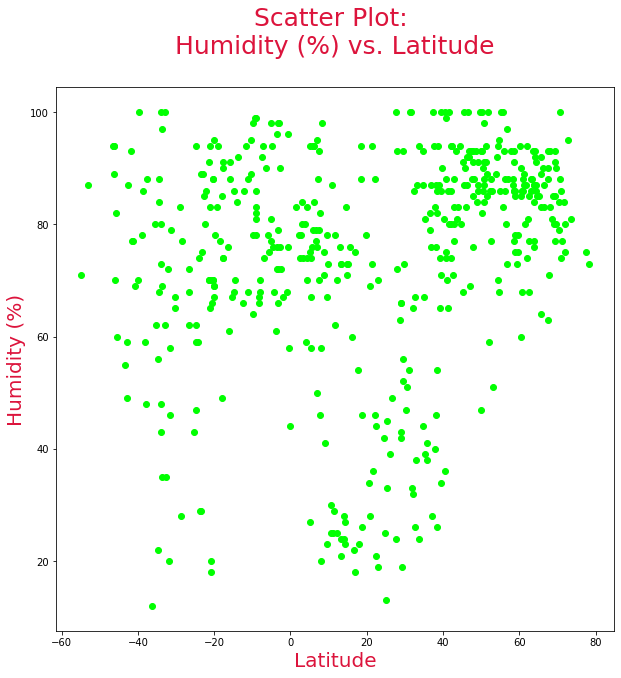

Note: This scatter plot is analyzing the relation between humidity (%) and latitude.


In [9]:
plt.figure()
plt.figure(figsize = (10, 10))
plt.scatter(cities_data['Latitude'], cities_data['Humidity (%)'], c = 'lime')
plt.xlabel('Latitude', fontsize = 20, c = 'crimson')
plt.ylabel('Humidity (%)', fontsize = 20, c = 'crimson')
plt.title('Scatter Plot: \n Humidity (%) vs. Latitude \n', fontsize = 25, c = 'crimson')
plt.savefig(pro_dir + 'output_images/02_scatter_plot_humid_vs_lat.png')
print(f'Date & Time: ' + (datetime.fromtimestamp(data['dt']).strftime("%d-%m-%Y %H:%M:%S")))
plt.show()
print('Note: This scatter plot is analyzing the relation between humidity (%) and latitude.')

## Cloudiness (%) vs. Latitude Scatter Plot

Date & Time: 14-01-2021 17:38:25


<Figure size 432x288 with 0 Axes>

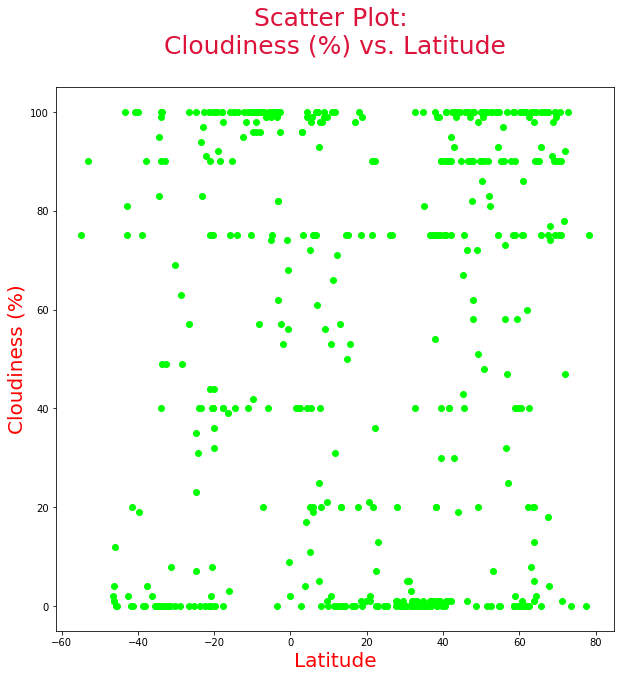

Note: This scatter plot is analyzing the relation between cloudiness (%) and latitude.


In [10]:
plt.figure()
plt.figure(figsize = (10, 10))
plt.scatter(cities_data['Latitude'], cities_data['Cloudiness (%)'], c = 'lime')
plt.xlabel('Latitude', fontsize = 20, c = 'r')
plt.ylabel('Cloudiness (%)', fontsize = 20, c = 'r')
plt.title('Scatter Plot: \n Cloudiness (%) vs. Latitude \n', fontsize = 25, c = 'crimson')
plt.savefig(pro_dir + 'output_images/03_scatter_plot_cloud_vs_lat.png')
print(f'Date & Time: ' + (datetime.fromtimestamp(data['dt']).strftime("%d-%m-%Y %H:%M:%S")))
plt.show()
print('Note: This scatter plot is analyzing the relation between cloudiness (%) and latitude.')

## Wind Speed (mph) vs. Latitude Scatter Plot

Date & Time: 14-01-2021 17:38:25


<Figure size 432x288 with 0 Axes>

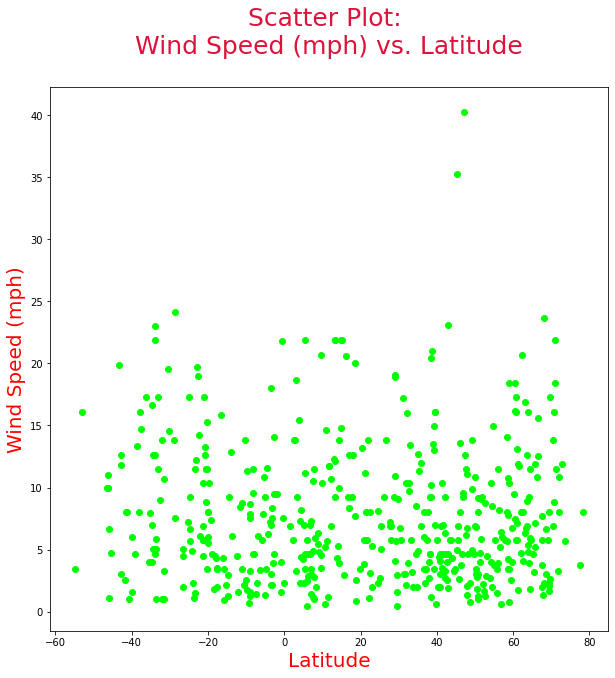

Note: This scatter plot is analyzing the relation between wind speed (mph) and latitude.


In [11]:
plt.figure()
plt.figure(figsize = (10, 10))
plt.scatter(cities_data['Latitude'], cities_data['Wind Speed (mph)'], c = 'lime')
plt.xlabel('Latitude', fontsize = 20, c = 'r')
plt.ylabel('Wind Speed (mph)', fontsize = 20, c = 'r')
plt.title('Scatter Plot: \n Wind Speed (mph) vs. Latitude \n', fontsize = 25, c = 'crimson')
plt.savefig(pro_dir + 'output_images/04_scatter_plot_windspeed_vs_lat.png')
print(f'Date & Time: ' + (datetime.fromtimestamp(data['dt']).strftime("%d-%m-%Y %H:%M:%S")))
plt.show()
print('Note: This scatter plot is analyzing the relation between wind speed (mph) and latitude.')

## Linear Regression:
###  Northern Hemisphere - Temperature (F) vs. Latitude

Regression: 0.7493510750219722
Date & Time: 14-01-2021 17:38:25


<Figure size 432x288 with 0 Axes>

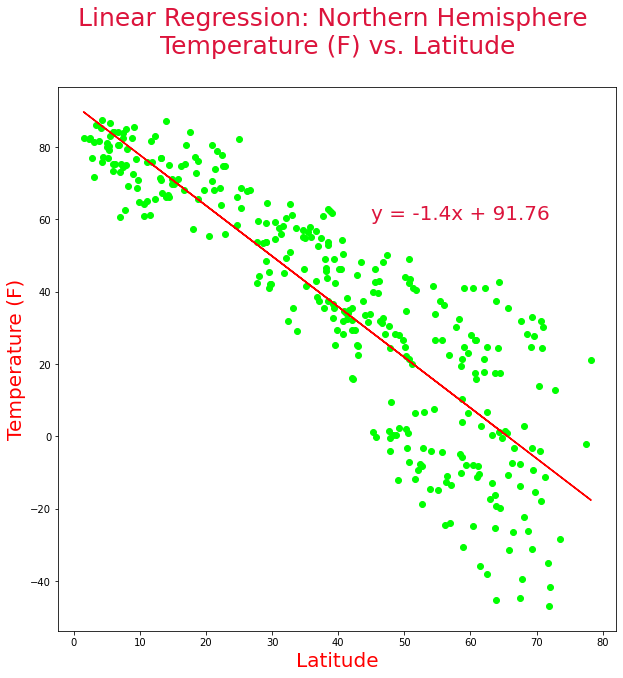

Note: This linear regression is showing the exponential relation between temperature (F) and latitude in Northern Hemisphere.


In [12]:
# Separating cities for Northen and Southern Hemisphere
cities_data_n_hem = cities_data[cities_data.Latitude >= 0]
cities_data_s_hem = cities_data[cities_data.Latitude < 0]

#print(cities_data_n_hem.shape,cities_data_s_hem.shape)
plt.figure()
plt.figure(figsize = (10, 10))
plt.scatter(cities_data_n_hem['Latitude'], cities_data_n_hem['Temperature (F)'], c = 'lime')
plt.xlabel('Latitude', fontsize = 20, c = 'r')
plt.ylabel('Temperature (F)', fontsize = 20, c = 'r')
plt.title('Linear Regression: Northern Hemisphere \n Temperature (F) vs. Latitude \n', fontsize = 25, c = 'crimson')
slope, intercept, reg_value, p_value, std_err = st.linregress(cities_data_n_hem['Latitude'], cities_data_n_hem['Temperature (F)'])
print('Regression:', reg_value ** 2)
plt.plot(cities_data_n_hem['Latitude'], slope * cities_data_n_hem['Latitude'] + intercept, color = 'red')
line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))
plt.annotate(line_eq, (45, 60), fontsize = 20, color = "crimson")
plt.savefig(pro_dir + 'output_images/05_regression_northern_temp_vs_lat.png')
print(f'Date & Time: ' + (datetime.fromtimestamp(data['dt']).strftime("%d-%m-%Y %H:%M:%S")))
plt.show()
print('Note: This linear regression is showing the exponential relation between temperature (F) and latitude in Northern Hemisphere.')

## Linear Regression:
###  Southern Hemisphere - Temperature (F) vs. Latitude

Regression: 0.20369596051215827
Date & Time: 14-01-2021 17:38:25


<Figure size 432x288 with 0 Axes>

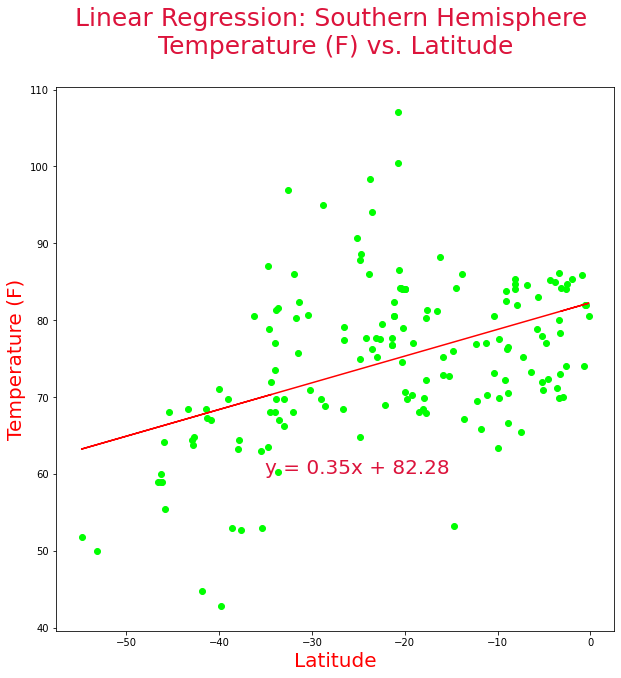

Note: This linear regression is showing the exponential relation between temperature (F) and latitude in Southern Hemisphere.


In [13]:
plt.figure()
plt.figure(figsize = (10, 10))
plt.scatter(cities_data_s_hem['Latitude'], cities_data_s_hem['Temperature (F)'], c = 'lime')
plt.xlabel('Latitude', fontsize = 20, c = 'r')
plt.ylabel('Temperature (F)', fontsize = 20, c = 'r')
plt.title('Linear Regression: Southern Hemisphere \n Temperature (F) vs. Latitude \n', fontsize = 25, c = 'crimson')
slope, intercept, reg_value, p_value, std_err = st.linregress(cities_data_s_hem['Latitude'], cities_data_s_hem['Temperature (F)'])
print('Regression:', reg_value ** 2)
plt.plot(cities_data_s_hem['Latitude'], slope * cities_data_s_hem['Latitude'] + intercept, color = 'red')
line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))
plt.annotate(line_eq, (-35, 60), fontsize = 20, color = "crimson")
plt.savefig(pro_dir + 'output_images/06_regression_southern_temp_vs_lat.png')
print(f'Date & Time: ' + (datetime.fromtimestamp(data['dt']).strftime("%d-%m-%Y %H:%M:%S")))
plt.show()
print('Note: This linear regression is showing the exponential relation between temperature (F) and latitude in Southern Hemisphere.')

## LINEAR REGRESSION:
###  Northern Hemisphere - Humidity (%) vs. Latitude

Regression: 0.17860785135125928
Date & Time: 14-01-2021 17:38:25


<Figure size 432x288 with 0 Axes>

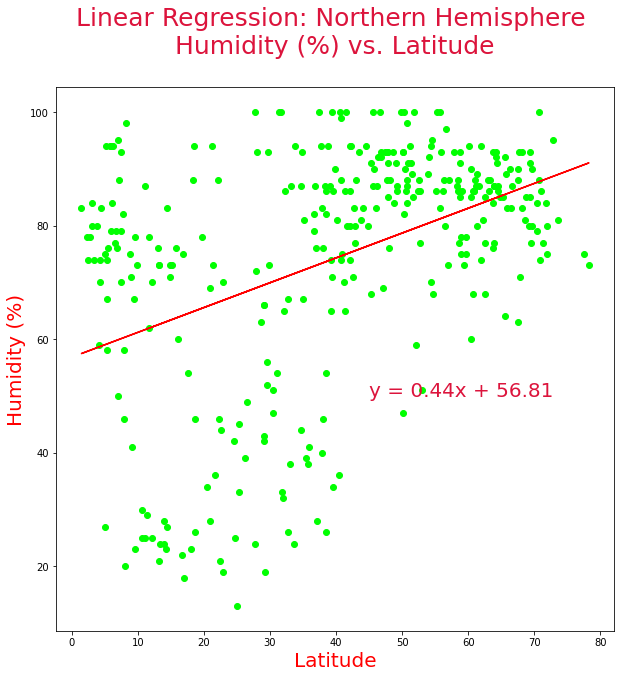

Note: This linear regression is showing the exponential relation between humidity (%) and latitude in Northern Hemisphere.


In [14]:
plt.figure()
plt.figure(figsize = (10, 10))
plt.scatter(cities_data_n_hem['Latitude'], cities_data_n_hem['Humidity (%)'], c = 'lime')
plt.xlabel('Latitude', fontsize = 20, c = 'r')
plt.ylabel('Humidity (%)', fontsize = 20, c = 'r')
plt.title('Linear Regression: Northern Hemisphere \n Humidity (%) vs. Latitude \n', fontsize = 25, c = 'crimson')
slope, intercept, reg_value, p_value, std_err = st.linregress(cities_data_n_hem['Latitude'], cities_data_n_hem['Humidity (%)'])
print('Regression:', reg_value ** 2)
plt.plot(cities_data_n_hem['Latitude'], slope * cities_data_n_hem['Latitude'] + intercept, color = 'red')
line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))
plt.annotate(line_eq, (45, 50), fontsize = 20, color = "crimson")
plt.savefig(pro_dir + 'output_images/07_regression_northern_humid_vs_lat.png')
print(f'Date & Time: ' + (datetime.fromtimestamp(data['dt']).strftime("%d-%m-%Y %H:%M:%S")))
plt.show()
print('Note: This linear regression is showing the exponential relation between humidity (%) and latitude in Northern Hemisphere.')

## Linear Regression:
###  Southern Hemisphere - Humidity (%) vs. Latitude

Regression: 0.031865655741483305
Date & Time: 14-01-2021 17:38:25


<Figure size 432x288 with 0 Axes>

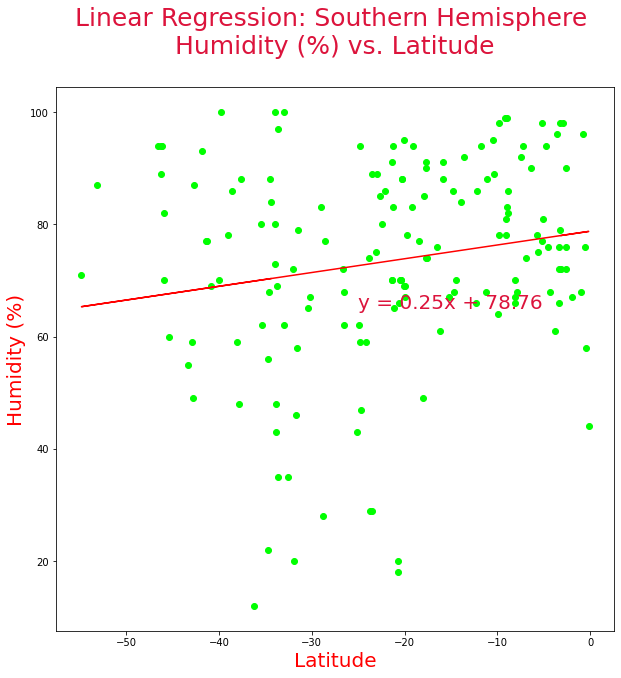

Note: This linear regression is showing the exponential relation between humidity (%) and latitude in Southern Hemisphere.


In [15]:
plt.figure()
plt.figure(figsize = (10, 10))
plt.scatter(cities_data_s_hem['Latitude'], cities_data_s_hem['Humidity (%)'], c = 'lime')
plt.xlabel('Latitude', fontsize = 20, c = 'r')
plt.ylabel('Humidity (%)', fontsize = 20, c = 'r')
plt.title('Linear Regression: Southern Hemisphere \n Humidity (%) vs. Latitude \n', fontsize = 25, c = 'crimson')
slope, intercept, reg_value, p_value, std_err = st.linregress(cities_data_s_hem['Latitude'], cities_data_s_hem['Humidity (%)'])
print('Regression:', reg_value ** 2)
plt.plot(cities_data_s_hem['Latitude'], slope * cities_data_s_hem['Latitude'] + intercept, color = 'red')
line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))
plt.annotate(line_eq, (-25, 65), fontsize = 20, color = "crimson")
plt.savefig(pro_dir + 'output_images/08_regression_southern_humid_vs_lat.png')
print(f'Date & Time: ' + (datetime.fromtimestamp(data['dt']).strftime("%d-%m-%Y %H:%M:%S")))
plt.show()
print('Note: This linear regression is showing the exponential relation between humidity (%) and latitude in Southern Hemisphere.')

## Linear Regression:
###  Northern Hemisphere - Cloudiness (%) vs. Latitude

Regression: 0.06248563152578757
Date & Time: 14-01-2021 17:38:25


<Figure size 432x288 with 0 Axes>

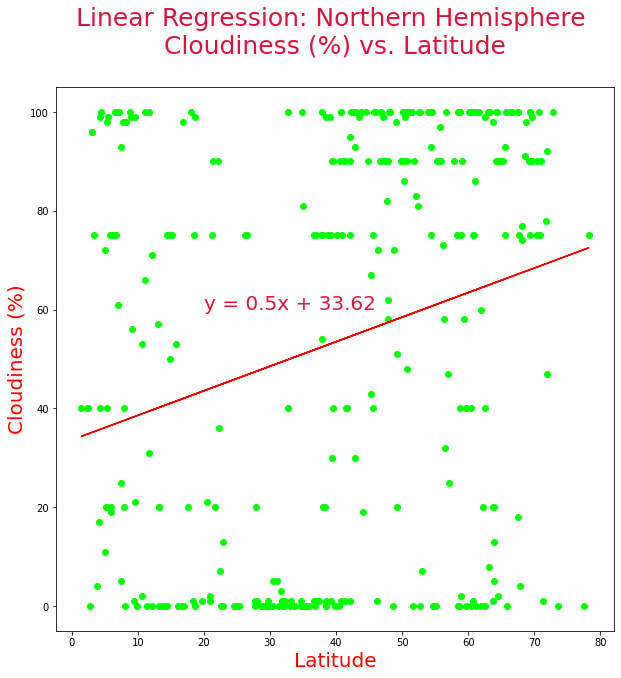

Note: This linear regression is showing the exponential relation between cloudiness (%) and latitude in Northern Hemisphere.


In [16]:
plt.figure()
plt.figure(figsize = (10, 10))
plt.scatter(cities_data_n_hem['Latitude'], cities_data_n_hem['Cloudiness (%)'], c = 'lime')
plt.xlabel('Latitude', fontsize = 20, c = 'r')
plt.ylabel('Cloudiness (%)', fontsize = 20, c = 'r')
plt.title('Linear Regression: Northern Hemisphere \n Cloudiness (%) vs. Latitude \n', fontsize = 25, c = 'crimson')
slope, intercept, reg_value, p_value, std_err = st.linregress(cities_data_n_hem['Latitude'], cities_data_n_hem['Cloudiness (%)'])
print('Regression:', reg_value ** 2)
plt.plot(cities_data_n_hem['Latitude'], slope * cities_data_n_hem['Latitude'] + intercept, color = 'red')
line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))
plt.annotate(line_eq, (20, 60), fontsize = 20, color = "crimson")
plt.savefig(pro_dir + 'output_images/09_regression_northern_cloud_vs_lat.png')
print(f'Date & Time: ' + (datetime.fromtimestamp(data['dt']).strftime("%d-%m-%Y %H:%M:%S")))
plt.show()
print('Note: This linear regression is showing the exponential relation between cloudiness (%) and latitude in Northern Hemisphere.')

## Linear Regression:
###  Southern Hemisphere - Cloudiness (%) vs. Latitude

Regression: 0.18279416559936443
Date & Time: 14-01-2021 17:38:25


<Figure size 432x288 with 0 Axes>

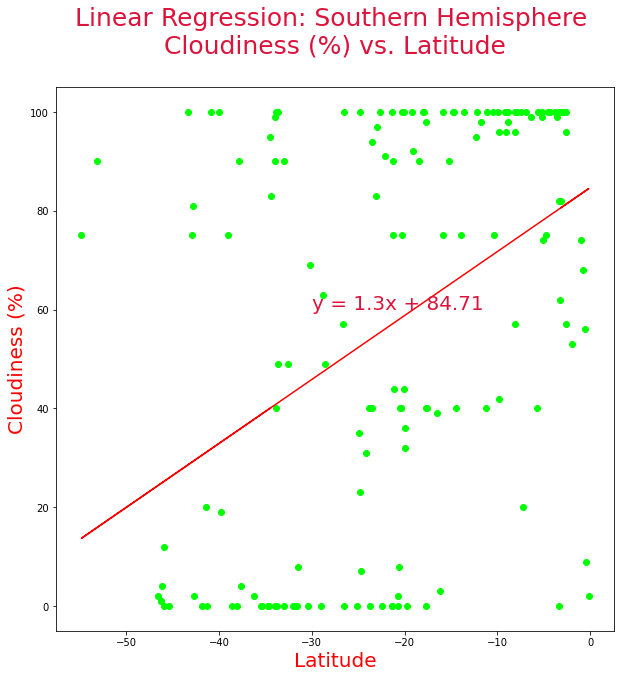

Note: This linear regression is showing the exponential relation between cloudiness (%) and latitude in Southern Hemisphere.


In [17]:
plt.figure()
plt.figure(figsize = (10, 10))
plt.scatter(cities_data_s_hem['Latitude'], cities_data_s_hem['Cloudiness (%)'], c = 'lime')
plt.xlabel('Latitude', fontsize = 20, c = 'r')
plt.ylabel('Cloudiness (%)', fontsize = 20, c = 'r')
plt.title('Linear Regression: Southern Hemisphere \n Cloudiness (%) vs. Latitude \n', fontsize = 25, c = 'crimson')
slope, intercept, reg_value, p_value, std_err = st.linregress(cities_data_s_hem['Latitude'], cities_data_s_hem['Cloudiness (%)'])
print('Regression:', reg_value ** 2)
plt.plot(cities_data_s_hem['Latitude'], slope * cities_data_s_hem['Latitude'] + intercept, color = 'red')
line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))
plt.annotate(line_eq, (-30, 60), fontsize = 20, color = "crimson")
plt.savefig(pro_dir + 'output_images/10_regression_southern_cloud_vs_lat.png')
print(f'Date & Time: ' + (datetime.fromtimestamp(data['dt']).strftime("%d-%m-%Y %H:%M:%S")))
plt.show()
print('Note: This linear regression is showing the exponential relation between cloudiness (%) and latitude in Southern Hemisphere.')

## Linear Regression:
###  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

Regression: 2.4051863312932996e-08
Date & Time: 14-01-2021 17:38:25


<Figure size 432x288 with 0 Axes>

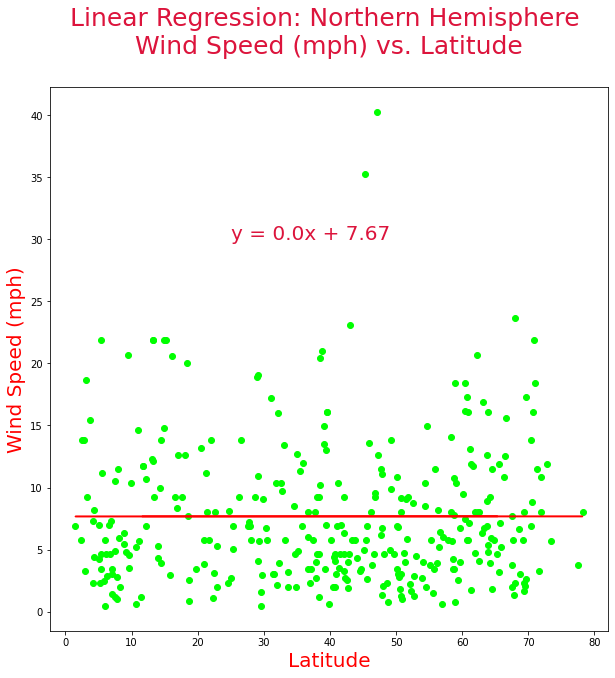

Note: This linear regression is showing the exponential relation between wind speed (mph) and latitude in Northern Hemisphere.


In [18]:
plt.figure()
plt.figure(figsize = (10, 10))
plt.scatter(cities_data_n_hem['Latitude'], cities_data_n_hem['Wind Speed (mph)'], c = 'lime')
plt.xlabel('Latitude', fontsize = 20, c = 'r')
plt.ylabel('Wind Speed (mph)', fontsize = 20, c = 'r')
plt.title('Linear Regression: Northern Hemisphere \n Wind Speed (mph) vs. Latitude \n', fontsize = 25, c = 'crimson')
slope, intercept, reg_value, p_value, std_err = st.linregress(cities_data_n_hem['Latitude'], cities_data_n_hem['Wind Speed (mph)'])
print('Regression:', reg_value ** 2)
plt.plot(cities_data_n_hem['Latitude'], slope * cities_data_n_hem['Latitude'] + intercept, color = 'red')
line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))
plt.annotate(line_eq, (25, 30), fontsize = 20, color = "crimson")
plt.savefig(pro_dir + 'output_images/11_regression_northern_windspeed_vs_lat.png')
print(f'Date & Time: ' + (datetime.fromtimestamp(data['dt']).strftime("%d-%m-%Y %H:%M:%S")))
plt.show()
print('Note: This linear regression is showing the exponential relation between wind speed (mph) and latitude in Northern Hemisphere.')

## Linear Regression:
###  Southern Hemisphere - Wind Speed (mph) vs. Latitude

Regression: 0.03937269198039042
Date & Time: 14-01-2021 17:38:25


<Figure size 432x288 with 0 Axes>

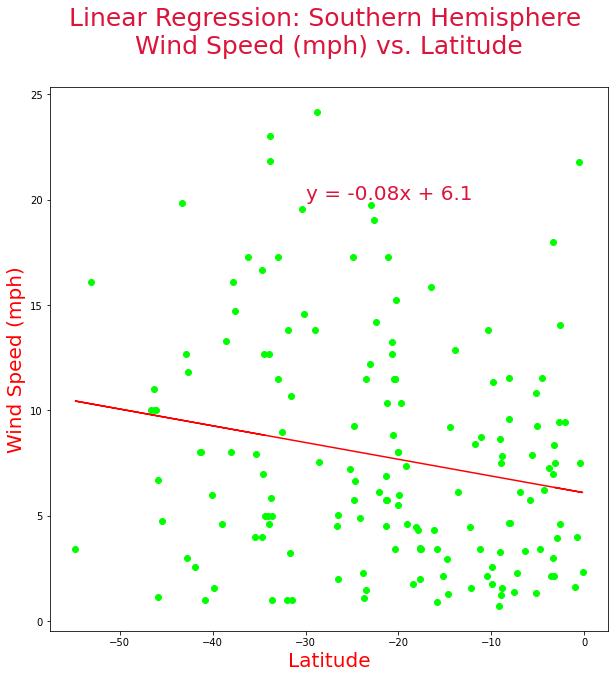

Note: This linear regression is showing the exponential relation between wind speed (mph) and latitude in Southern Hemisphere.


In [19]:
plt.figure()
plt.figure(figsize = (10, 10))
plt.scatter(cities_data_s_hem['Latitude'], cities_data_s_hem['Wind Speed (mph)'], c = 'lime')
plt.xlabel('Latitude', fontsize = 20, c = 'r')
plt.ylabel('Wind Speed (mph)', fontsize = 20, c = 'r')
plt.title('Linear Regression: Southern Hemisphere \n Wind Speed (mph) vs. Latitude \n', fontsize = 25, c = 'crimson')
slope, intercept, reg_value, p_value, std_err = st.linregress(cities_data_s_hem['Latitude'], cities_data_s_hem['Wind Speed (mph)'])
print('Regression:', reg_value ** 2)
plt.plot(cities_data_s_hem['Latitude'], slope * cities_data_s_hem['Latitude'] + intercept, color = 'red')
line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))
plt.annotate(line_eq, (-30, 20), fontsize = 20, color = "crimson")
plt.savefig(pro_dir + 'output_images/12_regression_southern_windspeed_vs_lat.png')
print(f'Date & Time: ' + (datetime.fromtimestamp(data['dt']).strftime("%d-%m-%Y %H:%M:%S")))
plt.show()
print('Note: This linear regression is showing the exponential relation between wind speed (mph) and latitude in Southern Hemisphere.')